In [63]:
import datetime
import pandas as pd
import seaborn as sns
import numpy.random as npr
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN
from sdv.evaluation import evaluate

DATASET_PATH = "data.csv"
USER_COLUMNS = ["user_id", "gender", "occupation", "age"]
MOVIE_COLUMNS = ["movie_id", *[f"tag{n}" for n in range(18)]]
SEED = 2021


In [53]:
df = pd.read_csv(DATASET_PATH)
df

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,movie_id,rating,timestamp,movie_name,tag0,tag1,tag2,tag3,tag4,...,tag12,tag13,tag14,tag15,tag16,tag17,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,M,45,5,77662


In [54]:
npr.seed(SEED)

In [55]:
user_df = df[USER_COLUMNS].drop_duplicates().drop(["user_id"], axis=1)
user_df

,gender,occupation,age
0,F,10,1
53,M,16,56
182,M,12,25
205,M,7,25
406,M,1,50
...,...,...,...
1000035,M,10,1
1000092,M,2,18
1000113,M,4,25
1000135,M,6,25


In [64]:
movie_df = df[MOVIE_COLUMNS].drop_duplicates().drop(["movie_id"], axis=1)
movie_df

,tag0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997414,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
def fit_evaluate(df, models, sample_size):
    result = pd.DataFrame()
    for model_name, model in models.items():
        model.fit(df)
        eval_result = evaluate(df, model.sample(sample_size), aggregate=False)
        eval_result["model_name"] = name
        result = pd.concat([result, eval_result])
    return result
        
    

In [ ]:
npr.seed(SEED)
fit_evaluate(
    movie_df, 
    models={
        "CTGAN": CTGAN(epochs=5, verbose=True),
        "CopulaGAN": CopulaGAN(epochs=5, verbose=True),
        "GaussianCopula": GaussianCopula(),
    },
    sample_size=1000
)

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Convergence

### Performance Comparison (varying rows)

In [33]:
def compare_performance(df, models, sample_sizes):
    results = []
    for model_name, model in models.items():
        for sample_size in sample_sizes:
            data = df.sample(sample_size)
            start = datetime.datetime.utcnow()
            model.fit(data)
            duration = datetime.datetime.utcnow() - start
            results.append({
                "model": model_name,
                "duration": duration,
                "rows": data.shape[0],
                "cols": data.shape[1]
            })
    return pd.DataFrame(results)
            

In [39]:
npr.seed(SEED)
perf_results = compare_performance(
    user_df, 
    models={
        "CTGAN": CTGAN(epochs=1, verbose=True),
        "CopulaGAN": CopulaGAN(epochs=1, verbose=True),
        "GaussianCopula": GaussianCopula(),
    },
    sample_sizes=range(500, 6000, 500)
)

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.7792,Loss D: -0.0062


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.6664,Loss D:  0.0021


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.7925,Loss D: -0.0004


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6927,Loss D: -0.0076


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.7779,Loss D:  0.0188


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.7151,Loss D: -0.0147


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.7241,Loss D: -0.0033


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6774,Loss D:  0.0034


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6528,Loss D:  0.0321


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6989,Loss D:  0.0564


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6639,Loss D:  0.0203


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", F

Epoch 1, Loss G:  0.9135,Loss D:  0.0332


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.8298,Loss D: -0.0156


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6699,Loss D:  0.0274


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/copulas/univariate/truncated_gaussian.py:43: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/copulas/univariate/truncated_gaussian.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From v

Epoch 1, Loss G:  0.7367,Loss D: -0.0261


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.7442,Loss D: -0.0234


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.7034,Loss D:  0.0168


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6161,Loss D:  0.0320


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6562,Loss D:  0.0293


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.5281,Loss D:  0.0536


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6699,Loss D: -0.0025


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.5436,Loss D:  0.0466


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [42]:
perf_results

,model,duration,rows,cols
0,CTGAN,0 days 00:00:00.514667,500,3
1,CTGAN,0 days 00:00:01.101037,1000,3
2,CTGAN,0 days 00:00:01.247642,1500,3
3,CTGAN,0 days 00:00:01.173144,2000,3
4,CTGAN,0 days 00:00:02.065931,2500,3
5,CTGAN,0 days 00:00:01.976714,3000,3
6,CTGAN,0 days 00:00:02.807011,3500,3
7,CTGAN,0 days 00:00:02.770824,4000,3
8,CTGAN,0 days 00:00:02.777520,4500,3
9,CTGAN,0 days 00:00:03.905038,5000,3


In [43]:
perf_results["duration"] = perf_results["duration"].map(lambda x: x.seconds)

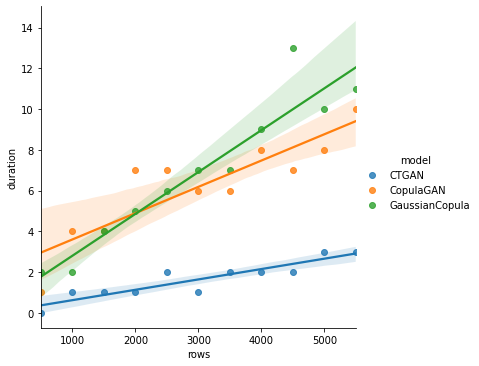

In [45]:
sns.lmplot(data=perf_results, x="rows", y="duration", hue="model")

### Peformance comparison (varying columns)

In [59]:
def compare_performance_varying_cols(df, models, max_cols=None):
    results = []
    max_cols = max_cols or df.shape[1]
    for model_name, model in models.items():
        for n_cols in range(1, max_cols):
            data = df[df.columns[:n_cols]]
            print(data)
            start = datetime.datetime.utcnow()
            model.fit(data)
            duration = datetime.datetime.utcnow() - start
            results.append({
                "model": model_name,
                "duration": duration,
                "rows": data.shape[0],
                "cols": data.shape[1]
            })
    return pd.DataFrame(results)

In [67]:
perf_results_2 = compare_performance_varying_cols(
    movie_df, 
    models={
        "CTGAN": CTGAN(epochs=1, verbose=True),
        "CopulaGAN": CopulaGAN(epochs=1, verbose=True),
        "GaussianCopula": GaussianCopula(),
    }
)

        tag0
0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
...      ...
996122   0.0
996169   0.0
996915   0.0
997414   0.0
999891   0.0

[3706 rows x 1 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.0423,Loss D: -0.0442
        tag0  tag1
0        0.0   0.0
1        1.0   0.0
2        0.0   0.0
3        0.0   0.0
4        1.0   0.0
...      ...   ...
996122   0.0   0.0
996169   0.0   0.0
996915   0.0   0.0
997414   0.0   0.0
999891   0.0   0.0

[3706 rows x 2 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.1032,Loss D: -0.1758
        tag0  tag1  tag2
0        0.0   0.0   1.0
1        1.0   0.0   0.0
2        0.0   0.0   0.0
3        0.0   0.0   1.0
4        1.0   0.0   0.0
...      ...   ...   ...
996122   0.0   0.0   0.0
996169   0.0   0.0   1.0
996915   0.0   0.0   0.0
997414   0.0   0.0   1.0
999891   0.0   0.0   1.0

[3706 rows x 3 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.1007,Loss D: -0.1889
        tag0  tag1  tag2  tag3
0        0.0   0.0   1.0   0.0
1        1.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0
4        1.0   0.0   0.0   0.0
...      ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0
996915   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0
999891   0.0   0.0   1.0   0.0

[3706 rows x 4 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.0709,Loss D: -0.0129
        tag0  tag1  tag2  tag3  tag4
0        0.0   0.0   1.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0

[3706 rows x 5 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.0518,Loss D:  0.0203
        tag0  tag1  tag2  tag3  tag4  tag5
0        0.0   0.0   1.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0

[3706 rows x 6 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.0662,Loss D: -0.0612
        tag0  tag1  tag2  tag3  tag4  tag5  tag6
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0

[3706 rows x 7 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.1985,Loss D: -0.2176
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
...      ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 8 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.0520,Loss D: -0.0239
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 9 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.3217,Loss D: -0.2497
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 10 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.2517,Loss D: -0.2158
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0

[3706 rows x 11 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.0190,Loss D:  0.0712
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  
0         0.0  
1 

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.0851,Loss D: -0.0607
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  
0         0

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.0696,Loss D:  0.0315
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  
0   

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.3074,Loss D: -0.1686
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.0349,Loss D: -0.2202
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.1714,Loss D: -0.0654
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G: -0.0588,Loss D:  0.0214
        tag0
0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
...      ...
996122   0.0
996169   0.0
996915   0.0
997414   0.0
999891   0.0

[3706 rows x 1 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.0642,Loss D: -0.2061
        tag0  tag1
0        0.0   0.0
1        1.0   0.0
2        0.0   0.0
3        0.0   0.0
4        1.0   0.0
...      ...   ...
996122   0.0   0.0
996169   0.0   0.0
996915   0.0   0.0
997414   0.0   0.0
999891   0.0   0.0

[3706 rows x 2 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.0182,Loss D: -0.0809
        tag0  tag1  tag2
0        0.0   0.0   1.0
1        1.0   0.0   0.0
2        0.0   0.0   0.0
3        0.0   0.0   1.0
4        1.0   0.0   0.0
...      ...   ...   ...
996122   0.0   0.0   0.0
996169   0.0   0.0   1.0
996915   0.0   0.0   0.0
997414   0.0   0.0   1.0
999891   0.0   0.0   1.0

[3706 rows x 3 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.0283,Loss D: -0.0686
        tag0  tag1  tag2  tag3
0        0.0   0.0   1.0   0.0
1        1.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0
4        1.0   0.0   0.0   0.0
...      ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0
996915   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0
999891   0.0   0.0   1.0   0.0

[3706 rows x 4 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.1299,Loss D: -0.1787
        tag0  tag1  tag2  tag3  tag4
0        0.0   0.0   1.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0

[3706 rows x 5 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.1838,Loss D: -0.0832
        tag0  tag1  tag2  tag3  tag4  tag5
0        0.0   0.0   1.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0

[3706 rows x 6 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.2067,Loss D: -0.1073
        tag0  tag1  tag2  tag3  tag4  tag5  tag6
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0

[3706 rows x 7 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G:  0.1043,Loss D: -0.0016
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
...      ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 8 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G:  0.0079,Loss D:  0.0846
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 9 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.0208,Loss D: -0.0252
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 10 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.3362,Loss D:  0.0336
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0

[3706 rows x 11 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.0820,Loss D: -0.1291
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  
0         0.0  
1 

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.1910,Loss D: -0.1689
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  
0         0

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.0459,Loss D: -0.0753
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  
0   

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.0183,Loss D: -0.0606
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.1107,Loss D: -0.1110
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G: -0.1011,Loss D: -0.0906
        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validat

Epoch 1, Loss G:  0.0749,Loss D:  0.0136
        tag0
0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
...      ...
996122   0.0
996169   0.0
996915   0.0
997414   0.0
999891   0.0

[3706 rows x 1 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1
0        0.0   0.0
1        1.0   0.0
2        0.0   0.0
3        0.0   0.0
4        1.0   0.0
...      ...   ...
996122   0.0   0.0
996169   0.0   0.0
996915   0.0   0.0
997414   0.0   0.0
999891   0.0   0.0

[3706 rows x 2 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2
0        0.0   0.0   1.0
1        1.0   0.0   0.0
2        0.0   0.0   0.0
3        0.0   0.0   1.0
4        1.0   0.0   0.0
...      ...   ...   ...
996122   0.0   0.0   0.0
996169   0.0   0.0   1.0
996915   0.0   0.0   0.0
997414   0.0   0.0   1.0
999891   0.0   0.0   1.0

[3706 rows x 3 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3
0        0.0   0.0   1.0   0.0
1        1.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0
4        1.0   0.0   0.0   0.0
...      ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0
996915   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0
999891   0.0   0.0   1.0   0.0

[3706 rows x 4 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4
0        0.0   0.0   1.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0

[3706 rows x 5 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5
0        0.0   0.0   1.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0

[3706 rows x 6 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0
...      ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0

[3706 rows x 7 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
...      ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 8 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 9 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

[3706 rows x 10 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0

[3706 rows x 11 columns]


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  
0         0.0  
1         0.0  
2         0.0  
3         0

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  
0         0.0    0.0  
1         0.0    0.0  
2     

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  
0         0.0    0.0    0.0  
1         0.0  

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14  
0         0.0    0.0    0.0    0.0  
1

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14  tag15  
0         0.0    0.0    0.0    

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


        tag0  tag1  tag2  tag3  tag4  tag5  tag6  tag7  tag8  tag9  tag10  \
0        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
4        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0    0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
996122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   
996169   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
996915   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0   
997414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   
999891   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   

        tag11  tag12  tag13  tag14  tag15  tag16  
0         0.0    0.0    

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [68]:
perf_results_2

,model,duration,rows,cols
0,CTGAN,0 days 00:00:00.719590,3706,1
1,CTGAN,0 days 00:00:00.795410,3706,2
2,CTGAN,0 days 00:00:00.816216,3706,3
3,CTGAN,0 days 00:00:00.933574,3706,4
4,CTGAN,0 days 00:00:00.941338,3706,5
5,CTGAN,0 days 00:00:00.999404,3706,6
6,CTGAN,0 days 00:00:00.785595,3706,7
7,CTGAN,0 days 00:00:00.757813,3706,8
8,CTGAN,0 days 00:00:00.783064,3706,9
9,CTGAN,0 days 00:00:00.761393,3706,10


In [71]:
perf_results_2["duration"] = perf_results_2["duration"].map(lambda x: x.seconds)

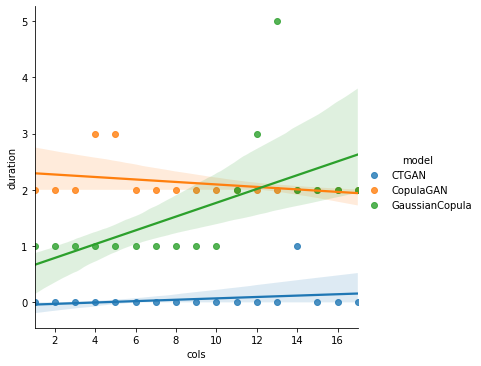

In [72]:
sns.lmplot(data=perf_results_2, x="cols", y="duration", hue="model")